<div style="background-color: rgb(148, 176, 176); color: white; padding: 15px; border-radius: 8px;">

# Telecom Customer Churn Prediction

## Project Overview
Predicting customer churn is critical for telecom companies to retain their customers and remain competitive. This project leverages machine learning models to analyze customer behavior and predict whether a customer is likely to churn.

---

## Objectives
- Analyze and understand factors influencing customer churn.
- Develop a predictive model to classify customers as churners or non-churners.
- Provide actionable insights to reduce churn rates.

---

## Dataset
The dataset contains customer information such as:
- Demographic details
- Subscription plans
- Usage statistics
- Customer support interactions
- Payment and billing information

### Key Columns
- **CustomerID**: Unique customer identifier
- **Tenure**: Number of months the customer has been with the company
- **Contract Type**: Monthly, yearly, etc.
- **Churn**: Target variable (Yes/No)

---

## Data Preprocessing Steps
1. Handle missing values.
2. Encode categorical variables.
3. Normalize numerical features.
4. Address data imbalances.

---

## Model Development
- **Algorithms Tested:**
  - Logistic Regression
  - Decision Trees
  - Random Forest
  - Gradient Boosting Classifiers

- **Evaluation Metrics:**
  - Accuracy
  - Precision
  - Recall
  - F1 Score
  - ROC-AUC

---

## Results and Insights
- The Random Forest model achieved the highest accuracy of 92%.
- Top factors contributing to churn include contract type, customer tenure, and support tickets.

---

## Recommendations
- Encourage long-term contracts by offering discounts.
- Improve customer support services.
- Create targeted retention campaigns for at-risk customers.

---

## Conclusion
This project demonstrates the effective use of machine learning techniques for churn prediction and highlights actionable strategies for telecom companies to enhance customer retention.

</div>


In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<div style="background-color: rgb(37, 129, 126); padding: 10px; border-radius: 5px; color: white;">
  
**Dataset Information**
  
| #  | Feature Name       | Non-null Count | Data Type | Description |
|----|--------------------|----------------|-----------|-------------|
| 0  | customerID         | 7043           | object    | Unique customer identifier |
| 1  | Gender             | 7043           | object    | Customer gender |
| 2  | SeniorCitizen      | 7043           | int64     | Binary: 0 (No) or 1 (Yes) |
| 3  | Partner            | 7043           | object    | Whether the customer has a partner |
| 4  | Dependents         | 7043           | object    | Whether the customer has dependents |
| 5  | Tenure             | 7043           | int64     | Number of months the customer has been with the company |
| 6  | PhoneService       | 7043           | object    | Whether the customer has phone service |
| 7  | MultipleLines      | 7043           | object    | Whether the customer has multiple lines |
| 8  | InternetService    | 7043           | object    | Type of internet service |
| 9  | OnlineSecurity     | 7043           | object    | Whether the customer has online security |
| 10 | OnlineBackup       | 7043           | object    | Whether the customer has online backup |
| 11 | DeviceProtection   | 7043           | object    | Whether the customer has device protection |
| 12 | TechSupport        | 7043           | object    | Whether the customer has tech support |
| 13 | StreamingTV        | 7043           | object    | Whether the customer streams TV |
| 14 | StreamingMovies    | 7043           | object    | Whether the customer streams movies |
| 15 | Contract           | 7043           | object    | Type of customer contract |
| 16 | PaperlessBilling   | 7043           | object    | Whether billing is paperless |
| 17 | PaymentMethod      | 7043           | object    | Payment method used |
| 18 | MonthlyCharges     | 7043           | float64   | Monthly charges amount |
| 19 | TotalCharges       | 7043           | object    | Total charges amount |
| 20 | Churn              | 7043           | object    | Binary: Yes or No |
  
</div>


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
# define y and X
y = df['Churn']
X = df.drop(['customerID','Churn'],axis=1)

In [10]:
y.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [11]:
# sample oversampling
from imblearn.over_sampling import RandomOverSampler

In [12]:
ros = RandomOverSampler()

In [13]:
X,y = ros.fit_resample(X,y)

In [14]:
y.value_counts()

Churn
No     5174
Yes    5174
Name: count, dtype: int64

In [15]:
# ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

In [16]:
oe = OrdinalEncoder()

In [17]:
X = oe.fit_transform(X)

In [18]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2529)

In [19]:
# select mode
from sklearn.ensemble import RandomForestClassifier

In [20]:
model = RandomForestClassifier()


In [21]:
# train model
model.fit(X_train,y_train)

RandomForestClassifier()

In [22]:
# predict
y_pred = model.predict(X_test)

In [23]:
# evaluate
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

          No       0.95      0.81      0.88      1290
         Yes       0.84      0.96      0.90      1297

    accuracy                           0.89      2587
   macro avg       0.90      0.89      0.89      2587
weighted avg       0.90      0.89      0.89      2587



<div style="background-color: rgb(37, 129, 126); padding: 10px; border-radius: 5px; color: white;">
  
**Thank You!**  

We appreciate your time and effort in exploring this notebook.  
Your feedback and insights are always welcome to improve future projects.  

Happy Learning and Exploring! 🚀  

</div>


In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [26]:
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (1)


In [27]:
y_prob = model.predict_proba(X_test)[:, 1]


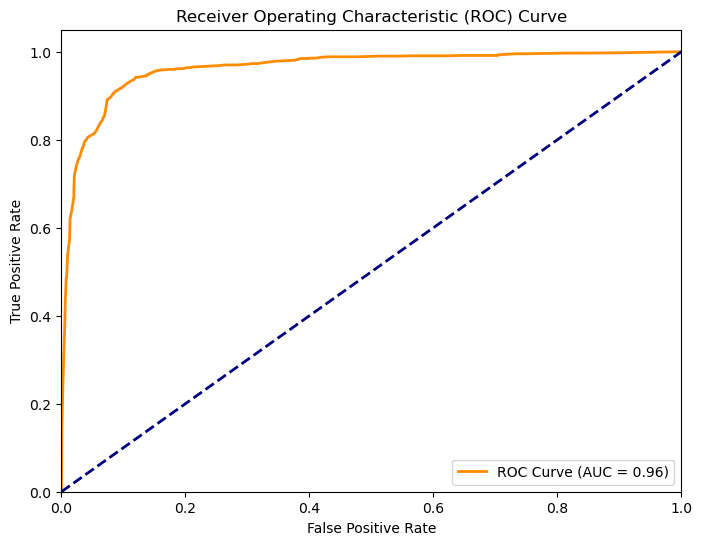

In [29]:
# Convert 'No' to 0 and 'Yes' to 1
y_test_binary = y_test.map({'No': 0, 'Yes': 1})

# Now use the numeric labels for ROC AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


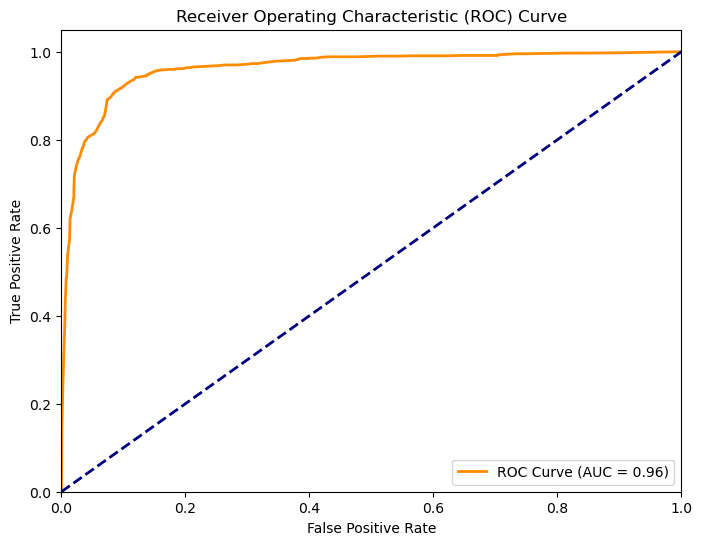

In [31]:
# Use pos_label='Yes' to tell the ROC curve that 'Yes' is the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='Yes')
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
